In [86]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
import rosbag_pandas
import dateutil


In [107]:
df = rosbag_pandas.bag_to_dataframe('/home/francesco/Desktop/1555683631.4240751.bag')

In [108]:
df['ros_time'] = df.index

In [109]:
df['timestamp'] = df['ros_time'].apply(lambda x: dateutil.parser.parse(str(x)).timestamp())
df['timestamp'] -= df['timestamp'][0]
df = df.set_index(df['timestamp'])  # reset back the index to the time


In [128]:
df['timestamp'] = df['timestamp'].apply(lambda x: int(x))

df[df['timestamp'] == 6].shape

(500, 9)

In [110]:
df['pose__pose_position_x']

timestamp
0.000000    -3.882511
0.004058    -3.882954
0.008462    -3.883393
0.013473    -3.883830
0.018139    -3.884264
0.021074    -3.884695
0.024184    -3.885125
0.028718    -3.885553
0.032800    -3.885979
0.037324    -3.886403
0.041767    -3.886826
0.044949    -3.887147
0.049205    -3.887430
0.053359    -3.887702
0.053359    -3.887702
0.057304    -3.887982
0.057304    -3.887982
0.060469    -3.888277
0.060469    -3.888277
0.064789    -3.888594
0.064789    -3.888594
0.069684    -3.888936
0.069684    -3.888936
0.072927    -3.889302
0.072927    -3.889302
0.076974    -3.889693
0.076974    -3.889693
0.080649    -3.890108
0.080649    -3.890108
0.084598    -3.890532
               ...   
10.151819   -4.124501
10.157944   -4.124637
10.162042   -4.124769
10.165201   -4.124896
10.169270   -4.125012
10.172249   -4.125126
10.174690   -4.125237
10.178114   -4.125348
10.182640   -4.125458
10.188586   -4.125561
10.194842   -4.125665
10.198454   -4.125771
10.201940   -4.125881
10.204320   -4.125995


In [54]:
def reduce_to_rate(df, rate):
    number_of_samples = df[df['timestamp'] < 1].shape[0]
    skip = number_of_samples // rate 
    return df.iloc[::skip]

In [80]:
from utilities.postprocessing.postprocessing import DataFrameHandler, PostProcessingConfig, PatchesHandler
from utilities.postprocessing.utils import *

In [76]:
config = PostProcessingConfig(base_dir='./test/',
                              maps_folder='/home/francesco/Documents/Master-Thesis/core/maps/test/',
                              # csv_dir='/home/francesco/Desktop/carino/vaevictis/data/train_no_tail#2/csv/',
                              out_dir='./test/',
                              patch_size=88,
                              advancement_th=0.45,
                              skip_every=12,
                              translation=[5, 5],
                              time_window=500,
                              name='test')
handle1 = DataFrameHandler(config=config)
handle = PatchesHandler(config=config)

In [93]:
len(df)

449

In [105]:
x = df_convert_quaterion2euler(df)
x = handle1.extract_cos_sin(df)
x = handle.df_add_advancement(df, 400)

x['advancement'].mean()

0.24672347006033274

In [106]:
reduced_df = reduce_to_rate(df, 10)
reduced_df[reduced_df['timestamp'] < 1].shape[0]

x = df_convert_quaterion2euler(reduced_df)
x = handle1.extract_cos_sin(reduced_df)
x = handle.df_add_advancement(reduced_df, 10)

x['advancement'].mean()

0.24878075666201602

In [94]:
df[['timestamp', 'ros_time']]

,timestamp,ros_time
timestamp,,
0.000000,0.000000,2019-04-19 13:06:20.297591296
0.002903,0.002903,2019-04-19 13:06:20.300494848
0.007023,0.007023,2019-04-19 13:06:20.304614912
0.011807,0.011807,2019-04-19 13:06:20.309398528
0.011807,0.011807,2019-04-19 13:06:20.309398528
0.021283,0.021283,2019-04-19 13:06:20.318874112
0.021283,0.021283,2019-04-19 13:06:20.318874112
0.025258,0.025258,2019-04-19 13:06:20.322849536
0.025258,0.025258,2019-04-19 13:06:20.322849536


In [5]:
df = pd.read_csv('/media/francesco/saetta/krock-dataset/92/train/csvs/bars1/1550616906.6299658-complete.csv')
df[df['index'] < 2].shape

(526, 16)

In [5]:
hm = np.zeros((200,200))

offset = 42
xc, yc = hm.shape[0] //2, hm.shape[1]//2

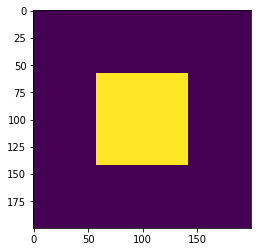

In [6]:
hm[xc - offset: xc + offset , yc - offset: yc + offset] = 255
# hm[:,65:65 + 20] = 255
plt.imshow(hm.squeeze())
plt.show()

In [7]:
cv2.imwrite('/home/francesco/Desktop/center.png', hm)

True